# Introduction: COVID-19 Data Science Project

In this notebook, I present a data-science project which focuses on the analysis of COVID-19 effect on a worldwide scale. The has been to make use of "real-life" datasets, apply thorough data cleaning and exploration, and eventually, identify emerging trends of the coronavirus pandemic. 

## Workflow followed

The process I followed has generally been:

    1.Data import
    2.Data cleaning, reshaping, quality checks
    3.Exploratory Data Analysis (EDA)
    4.Final interactive visualization on Tableau Software
     
For the data import & mining I have used wget/ pandas libraries, while for EDA I have also involved matplotlib/ seaborn/ folium. The COVID-19 data are extracted by the John Hopkins University github page, while the country population data are extracted from the United Nations and World Bank latest available datasets.

Eventually the cleaned datasets have been exported to csv file and passed onto Tableau, to enable higher interactivity with the user. I created two visualizations, one for **worldwide effect**, and one **US-specific**. You can give them a try in the following links:

* <a href="https://public.tableau.com/profile/charisispapacharisis#!/vizhome/Covid-19-WorldwideEvolution/Dashboard" target="_blank">**Worldwide COVID-19 Dashboard**</a>.

* <a href="https://public.tableau.com/profile/charisispapacharisis#!/vizhome/USACOVID-19Dashboards/COVID-19OverviewintheUS" target="_blank">**USA COVID-19 Dashboard**</a>.


## Imports & Data Access

I use the standard data science library of pandas, as well as the wget module for accessing the COVID-19 datasets.

In [1]:
# Importing the required libraries
import pandas as pd
import wget
from pandas import *

# Setting the output dimensions to more rows and columns, in order to better troubleshoot code (if needed)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)

# Accessing the John Hopkins University github page, and the relevant csv addresses
urls=['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

# Downloading the csv files to the working directory
for url in urls:
    wget.download(url)

## Data Cleaning and Formatting

I load the accessed datasets from John Hopkins University to dataframes in Python, in order to better manipulate them. I examine the dataset structure and reshape to the right form for the upcoming (e.g. pivoting dates columns).

In [2]:
# Loading the CSVs in Python dataframes.
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

# Identifying that columns 5 onwards of the csv files reflect dates and need to be unpivoted.
dates = confirmed_df.columns[4:]

# checking the .head of the dataframe.
confirmed_df.head()

# Reshaping the three dataframes(Cases, Deaths, Recoveries) in pivotable format.
confirmed_df_long = pd.melt(
    confirmed_df,
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)

deaths_df_long = pd.melt(
    deaths_df,
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = pd.melt(
    recovered_df,
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

# checking the .tal of the Cases dataframe to see format and total length.
confirmed_df_long.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
28457,NaN,Western Sahara,24.215500,-12.885800,5/7/20,6
28458,NaN,Sao Tome and Principe,0.186360,6.613081,5/7/20,187
28459,NaN,Yemen,15.552727,48.516388,5/7/20,25
28460,NaN,Comoros,-11.645500,43.333300,5/7/20,8
28461,NaN,Tajikistan,38.861034,71.276093,5/7/20,461


Taking a look at the Cases data, we can already see a couple of issues we'll have to solve. 

First of all, we see that China, UK, Netherlands, Canada, France, Australia, Denmark are countries that come with a breakdown in **Provinces**, while the other countries *do not do so* (NaN values). Using the pivot_table Python functionality we examine what Provinces these six countries include.

In [3]:
confirmed_pivoted = pivot_table(confirmed_df_long, index=['Country/Region','Province/State'], columns = None, values = ['Confirmed'])
print (confirmed_pivoted);

                                                    Confirmed
Country/Region Province/State                                
Australia      Australian Capital Territory         40.682243
               New South Wales                    1137.598131
               Northern Territory                   10.672897
               Queensland                          401.915888
               South Australia                     173.214953
               Tasmania                             63.485981
               Victoria                            512.355140
               Western Australia                   204.766355
Canada         Alberta                            1144.691589
               British Columbia                    670.616822
               Diamond Princess                      0.065421
               Grand Princess                        6.214953
               Manitoba                             90.532710
               New Brunswick                        43.280374
        

From the above, we observe the fact that under Canada there are the *Diamond Princess* & *Grand Princess* appearing, which requires further research. 
Searching online, it is clear that these are **ships** where coronavirus cases occurred. We will need to treat this case differently.

As a next step, I also list all countries featured into the cases dataframe, for data validation:

In [4]:
country_list =(confirmed_df_long['Country/Region'].unique())
for i in country_list:
    print (i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Diamond Princess
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malaysia
Maldives
Malta
Mauritania
Mauritius
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Namibia
Nepal
Netherlands
New Zealand
Nicara

Here also we observe Grand Princess being featured, this time as a *country*. Similarly, another cruise ship appearing is MS Zaandam. Checking the other two dataframes (Deaths, Recovered) we observe the same ship cases.

I decide to remove the dataframe rows where ships appear, either as *Country* or as *Province*, for consistency.
I will do so once merging all three dataframes together.


## Missing Values

The below function allows to check which features (columns) of our dataframe miss values, and the % over the total.


In [5]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

# How many values we miss from the confirmed_long dataframe?
missing_values_table(confirmed_df_long)

Your selected dataframe has 6 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Province/State,19688,69.2


We see that the Province/State is the only field with missing values, and also with a high %, as only the few aforementioned countries provide this information.

Therefore, I will group the dataframe by Country, and remove the Province/State column, so that all countries share the same level of detail.

In [6]:
# Removing the column
confirmed_df_long = confirmed_df_long.drop(['Province/State'],axis = 1)

# Checking if na values are still there
confirmed_df_long.isna().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
dtype: int64

As we see from above, there is no other missing value in the dataframe. Therefore, no need to impute anything at this stage.

## Groupping

Moving on, I will group the dataframe by Date and Country, sort accordingly, and 'reset index' in order to re-enumerate the dataframe from scratch.

In [7]:
# I will not keep the Lat/Long details as I do not need for now.
confirmed_df_groupped = confirmed_df_long.groupby(['Date','Country/Region']).agg({'Confirmed':'sum'}).reset_index()

# Changing the Date field to the correct type ('Date')
confirmed_df_groupped['Date']=pd.to_datetime(confirmed_df_groupped['Date'])

# Sorting the dataframe by Date, descending order
confirmed_df_groupped.sort_values(by=['Date'])

,Date,Country/Region,Confirmed
0,2020-01-22,Afghanistan,0
120,2020-01-22,Nepal,0
121,2020-01-22,Netherlands,0
122,2020-01-22,New Zealand,0
123,2020-01-22,Nicaragua,0
...,...,...,...
19886,2020-05-07,Gambia,18
19887,2020-05-07,Georgia,615
19888,2020-05-07,Germany,169430
19879,2020-05-07,Estonia,1720


For a quick sanity check, I will have a look at the Canada values of this dataframe. We observe that the groupping yields the correct figures by date. This can be also crosschecked by referring to external online sources.

In [8]:
confirmed_df_groupped[(confirmed_df_groupped['Country/Region'] == 'Canada')]

,Date,Country/Region,Confirmed
32,2020-01-22,Canada,0
219,2020-01-23,Canada,0
406,2020-01-24,Canada,0
593,2020-01-25,Canada,0
780,2020-01-26,Canada,1
967,2020-01-27,Canada,1
1154,2020-01-28,Canada,2
1341,2020-01-29,Canada,2
1528,2020-01-30,Canada,2
1715,2020-01-31,Canada,4


I will follow the same process for the Deaths and the Recovered dataframe:

In [9]:
# Deaths dataframe:
# a) removing the Province field due to missing values and for consistency
deaths_df_long = deaths_df_long.drop(['Province/State'],axis = 1)

# b) groupping the dataframe by Date and Country
deaths_df_groupped = deaths_df_long.groupby(['Date','Country/Region']).agg({'Deaths':'sum'}).reset_index()

# c) changing the Date field to correct type
deaths_df_groupped['Date']=pd.to_datetime(deaths_df_groupped['Date'])

# sorting by Date in descending order
deaths_df_groupped.sort_values(by=['Date'])

,Date,Country/Region,Deaths
0,2020-01-22,Afghanistan,0
120,2020-01-22,Nepal,0
121,2020-01-22,Netherlands,0
122,2020-01-22,New Zealand,0
123,2020-01-22,Nicaragua,0
...,...,...,...
19886,2020-05-07,Gambia,1
19887,2020-05-07,Georgia,9
19888,2020-05-07,Germany,7392
19879,2020-05-07,Estonia,56


In [10]:
# Recovered dataframe:
recovered_df_long = recovered_df_long.drop(['Province/State'],axis = 1) # check if that gives error
recovered_df_groupped = recovered_df_long.groupby(['Date','Country/Region']).agg({'Recovered':'sum'}).reset_index()
recovered_df_groupped['Date']=pd.to_datetime(recovered_df_groupped['Date'])
recovered_df_groupped.sort_values(by=['Date'])

,Date,Country/Region,Recovered
0,2020-01-22,Afghanistan,0
120,2020-01-22,Nepal,0
121,2020-01-22,Netherlands,0
122,2020-01-22,New Zealand,0
123,2020-01-22,Nicaragua,0
...,...,...,...
19886,2020-05-07,Gambia,9
19887,2020-05-07,Georgia,275
19888,2020-05-07,Germany,141700
19879,2020-05-07,Estonia,273


## Merging in one dataframe

After this prework, it is time to bring everything in one dataframe. This will take place via a left join, firstly between the Cases and Deaths datasets, and then between the resulting one and the Recovered dataframe. I use the .info() function to keep track of the datafrane lengths and datatypes.

In [11]:
# Merging all three dataframes to one. Firstly the cases (confirmed) with the deaths dataframes - temporary dataframe.
merged_temp = confirmed_df_groupped.merge(deaths_df_groupped, 'left',on=['Country/Region', 'Date'] )

# A quick check of the info datatypes, null values (if any) and lenghts
merged_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20009 entries, 0 to 20008
Data columns (total 4 columns):
Date              20009 non-null datetime64[ns]
Country/Region    20009 non-null object
Confirmed         20009 non-null int64
Deaths            20009 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 781.6+ KB


In [12]:
# Sorting by Date
merged_temp.sort_values(by=['Date'])

,Date,Country/Region,Confirmed,Deaths
0,2020-01-22,Afghanistan,0,0
120,2020-01-22,Nepal,0,0
121,2020-01-22,Netherlands,0,0
122,2020-01-22,New Zealand,0,0
123,2020-01-22,Nicaragua,0,0
...,...,...,...,...
19886,2020-05-07,Gambia,18,1
19887,2020-05-07,Georgia,615,9
19888,2020-05-07,Germany,169430,7392
19879,2020-05-07,Estonia,1720,56


In [13]:
# Merging the temporary dataframe with the Recovered, in order to form a 'total' dataframe
merged_total = merged_temp.merge(recovered_df_groupped,how='left',on=['Country/Region', 'Date'])

# Sorting by Date
merged_total.sort_values(by=['Date'])

,Date,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Afghanistan,0,0,0
120,2020-01-22,Nepal,0,0,0
121,2020-01-22,Netherlands,0,0,0
122,2020-01-22,New Zealand,0,0,0
123,2020-01-22,Nicaragua,0,0,0
...,...,...,...,...,...
19886,2020-05-07,Gambia,18,1,9
19887,2020-05-07,Georgia,615,9,275
19888,2020-05-07,Germany,169430,7392,141700
19879,2020-05-07,Estonia,1720,56,273


In [14]:
# Checking if there are any missing values left
merged_total.isna().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [15]:
# checking the info of the total dataframe
merged_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20009 entries, 0 to 20008
Data columns (total 5 columns):
Date              20009 non-null datetime64[ns]
Country/Region    20009 non-null object
Confirmed         20009 non-null int64
Deaths            20009 non-null int64
Recovered         20009 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 937.9+ KB


In [16]:
# As mentioned earlier, I will remove the lines where cruise ships appear as Country, for consistency. 
merged_total = merged_total.loc[~((merged_total['Country/Region']=='Grand Princess') |
                                (merged_total['Country/Region']=='Diamond Princess') |
                                (merged_total['Country/Region']=='MS Zaandam'))]

My dataframe includes the information for *Confirmed (cases), Deaths, Recovered*. 
We also notice that whatever is a Confirmed case, but not Closed one (that is, death or recovery), has to be an **Active** case. *(Active = confirmed - deaths - recovered)*. We will add this as a column calculation to the dataframe.

In [17]:
merged_total['Active'] = merged_total['Confirmed'] - merged_total['Deaths'] - merged_total['Recovered']

# Checking how the dataframe tail looks like
merged_total.tail()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
20004,2020-05-07,West Bank and Gaza,375,2,176,197
20005,2020-05-07,Western Sahara,6,0,5,1
20006,2020-05-07,Yemen,25,5,1,19
20007,2020-05-07,Zambia,153,4,103,46
20008,2020-05-07,Zimbabwe,34,4,5,25


In [18]:
# Checking the info after the last changes
merged_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19795 entries, 0 to 20008
Data columns (total 6 columns):
Date              19795 non-null datetime64[ns]
Country/Region    19795 non-null object
Confirmed         19795 non-null int64
Deaths            19795 non-null int64
Recovered         19795 non-null int64
Active            19795 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.1+ MB


In [19]:
# Sorting values by Country and Date, and resetting index
merged_total = merged_total.sort_values(['Country/Region', 'Date'])
merged_total.reset_index(drop=True, inplace=True)
merged_total.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


## Time-Series analysis: Calculating New incidents per day

The data retrieved reflect **cumulative** informations. E.g. the 'Confirmed cases' information for the '28th April 2020' reflects how many cases there are in **total**, up-to (and including) this date.

What would be interesting to see though, is how much has this data fluctuated day-by-day, and if it is growing with a consistent rate, or not. This will help us evaluate if the 'curve is flattening'. 

I will calculate the **NEW** (daily) *Confirmed / Deaths / Recovered*,using the .diff() function which calculates the difference of one row value versus the one above. I will then add these as extra columns in the existing dataframe.

The way I have sorted the dataframe -first by **Country** and then by **Date**- ensures that I will get the correct numbers, apart from the cases where data of one country finishes, and the 'next' country in order follows. 
In that case, this calculation will yield NaN values, and it is meaningful to fill-in those with 0.

In [20]:
merged_total['New Confirmed'] = merged_total.groupby(['Country/Region'])['Confirmed'].diff()
merged_total['New Deaths'] = merged_total.groupby(['Country/Region'])['Deaths'].diff()
merged_total['New Recovered'] = merged_total.groupby(['Country/Region'])['Recovered'].diff()

# I will print the last 1000 lines to observe the changes by Date and by Country in all columns. 
(merged_total).tail(1000)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New Deaths,New Recovered
18795,2020-04-01,United Kingdom,29865,3100,179,26586,4384.0,671.0,0.0
18796,2020-04-02,United Kingdom,34173,3752,192,30229,4308.0,652.0,13.0
18797,2020-04-03,United Kingdom,38689,4467,208,34014,4516.0,715.0,16.0
18798,2020-04-04,United Kingdom,42477,5228,215,37034,3788.0,761.0,7.0
18799,2020-04-05,United Kingdom,48436,5874,229,42333,5959.0,646.0,14.0
18800,2020-04-06,United Kingdom,52279,6445,287,45547,3843.0,571.0,58.0
18801,2020-04-07,United Kingdom,55949,7483,325,48141,3670.0,1038.0,38.0
18802,2020-04-08,United Kingdom,61474,8519,345,52610,5525.0,1036.0,20.0
18803,2020-04-09,United Kingdom,65872,9623,359,55890,4398.0,1104.0,14.0
18804,2020-04-10,United Kingdom,74605,10776,588,63241,8733.0,1153.0,229.0


In [21]:
# I will fill in the NaN cases with 0, as anticipated.
merged_total.fillna(0, inplace=True)

# Recaping the info for the dataset
merged_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19795 entries, 0 to 19794
Data columns (total 9 columns):
Date              19795 non-null datetime64[ns]
Country/Region    19795 non-null object
Confirmed         19795 non-null int64
Deaths            19795 non-null int64
Recovered         19795 non-null int64
Active            19795 non-null int64
New Confirmed     19795 non-null float64
New Deaths        19795 non-null float64
New Recovered     19795 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 1.4+ MB


From the above, we see that the newly created columns are of *float* type. We will fix this to *Int*, as 
they should be *whole numbers* due to their underlying meaning.

In [22]:
merged_total['New Confirmed']=merged_total['New Confirmed'].astype(int)
merged_total['New Deaths']=merged_total['New Deaths'].astype(int)
merged_total['New Recovered']=merged_total['New Recovered'].astype(int)

# We check that the change took effect
merged_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19795 entries, 0 to 19794
Data columns (total 9 columns):
Date              19795 non-null datetime64[ns]
Country/Region    19795 non-null object
Confirmed         19795 non-null int64
Deaths            19795 non-null int64
Recovered         19795 non-null int64
Active            19795 non-null int64
New Confirmed     19795 non-null int32
New Deaths        19795 non-null int32
New Recovered     19795 non-null int32
dtypes: datetime64[ns](1), int32(3), int64(4), object(1)
memory usage: 1.1+ MB


As mentioned, a closed case reflects either a *recovered* person, or a *death*. We can add this info also in the dataframe:

In [23]:
merged_total['Closed'] = merged_total['Deaths'] + merged_total['Recovered']

# I export the dataframe in csv, for future reference
merged_total.to_csv('Merged_total.csv',index = False)

Now that the dataframe is almost final, I can start answering some questions, kicking-off my exploratory data analysis, such as how many countries have been affected, what is the total number of cases and deaths worldwide, etc.

In [24]:
print("Total number of countries affected with Coronavirus: ",len(merged_total["Country/Region"].unique()))

Total number of countries affected with Coronavirus:  185


In [25]:
total_world_cases = merged_total[(merged_total['Date'] == max(merged_total['Date']))]['Confirmed'].sum()
print("Total number of cases worldwide: ",total_world_cases)

Total number of cases worldwide:  3844997


In [26]:
total_world_deaths = merged_total[(merged_total['Date'] == max(merged_total['Date']))]['Deaths'].sum()
print("Total number of deaths worldwide: ",total_world_deaths)

Total number of deaths worldwide:  269552


## Population dataset: Leveraging on a second datasource

In order to calculate later **Mortality Rates**, I will need population data by country, a datapoint which is not provided by the John Hopkins University.

After researching, I decide to make use of the United Nations populations dataset since it is considered one of the most accurate.

In [27]:
# I access the dataset in csv format directly from the UN website:
population_df = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')

# Checking the fields contained in the population dataframe
population_df.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [28]:
# Looking at the data types and checking for missing values
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280932 entries, 0 to 280931
Data columns (total 10 columns):
LocID         280932 non-null int64
Location      280932 non-null object
VarID         280932 non-null int64
Variant       280932 non-null object
Time          280932 non-null int64
MidPeriod     280932 non-null float64
PopMale       250876 non-null float64
PopFemale     250876 non-null float64
PopTotal      280932 non-null float64
PopDensity    280932 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 21.4+ MB


One needs to observe that the dataframe includes population details of different years ('Time' column), and different projections ('Variant' column). 

I will keep the 'No change' projection, as of 2020, with the following code:

In [29]:
population_df_new = population_df.loc[(population_df['Time']==2020) & (population_df['Variant']=='No change')]

# Checking the dataframe head
population_df_new.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
637,4,Afghanistan,9,No change,2020,2020.5,19976.265,18952.076,38928.341,59.627
1521,903,Africa,9,No change,2020,2020.5,669878.340,670719.773,1340598.113,45.216
3613,8,Albania,9,No change,2020,2020.5,1464.714,1413.086,2877.800,105.029
4497,12,Algeria,9,No change,2020,2020.5,22153.808,21697.235,43851.043,18.411
5381,16,American Samoa,9,No change,2020,2020.5,NaN,NaN,55.197,275.985


In [30]:
# Dropping any columns that are not useful
population_df_new= population_df_new.drop(['LocID','VarID','Variant','MidPeriod','PopMale','PopFemale','PopDensity'], axis=1)

In [31]:
# Resetting index of the population dataframe
population_df_new.reset_index(drop=True, inplace=True)

Apart from the above cleaning (e.g. dropping unnecessary fields), I have observed that the PopTotal (total country population) is expressed in '*thousands* of people'. 
I will change the scale to 'number of people', by multiplying by 1000:

In [32]:
population_df_new['PopTotal'] = population_df_new['PopTotal']* 1000
population_df_new.head()

,Location,Time,PopTotal
0,Afghanistan,2020,3.892834e+07
1,Africa,2020,1.340598e+09
2,Albania,2020,2.877800e+06
3,Algeria,2020,4.385104e+07
4,American Samoa,2020,5.519700e+04


In [33]:
# Checking the dataframe info
population_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 3 columns):
Location    285 non-null object
Time        285 non-null int64
PopTotal    285 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.8+ KB


In [34]:
#I print all different countries available in the UN country list:
for i in (population_df_new['Location']):
    print(i)

Afghanistan
Africa
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antigua and Barbuda
Argentina
Armenia
Aruba
Asia
Australia
Australia/New Zealand
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia (Plurinational State of)
Bonaire, Sint Eustatius and Saba
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Caribbean
Cayman Islands
Central African Republic
Central America
Central Asia
Central and Southern Asia
Chad
Channel Islands
Chile
China
China, Hong Kong SAR
China, Macao SAR
China, Taiwan Province of China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Croatia
Cuba
Curaçao
Cyprus
Czechia
Côte d'Ivoire
Dem. People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Eastern Africa
Eastern Asia
Eastern Europe
Eastern and South-Eastern Asia
Ecuador
Egypt
El Salvador
Equatorial Guinea
E

By printing the exhaustive list of the countries as featured in the UN dataset, we notice: 
* some aggregations (e.g. Europe) which are not relevant for our analysis,
* most countries having names same with the current analysis,
* some countries for which UN follows different naming conventions. 

I have to map the latter ones and rename accordingly, to keep consistency.

In [35]:
# Let's recall our country names, as listed in the merged_total dataframe:
df_countries = merged_total['Country/Region'].unique()

# For each of these country names, I am running a "vlookup" on the UN country list. 
# If the country is not found there, I flag it with the word "Mismatch", and I will take action to rectify:

for i in df_countries:
    if i not in(population_df_new['Location'].unique()):
        print (i,'--> Mismatch')

Bolivia --> Mismatch
Brunei --> Mismatch
Burma --> Mismatch
Congo (Brazzaville) --> Mismatch
Congo (Kinshasa) --> Mismatch
Cote d'Ivoire --> Mismatch
Iran --> Mismatch
Korea, South --> Mismatch
Kosovo --> Mismatch
Laos --> Mismatch
Moldova --> Mismatch
Russia --> Mismatch
Syria --> Mismatch
Taiwan* --> Mismatch
Tanzania --> Mismatch
US --> Mismatch
Venezuela --> Mismatch
Vietnam --> Mismatch
West Bank and Gaza --> Mismatch


So I observe that there are **19 countries** whose name is mismatching between the two dataframes. 
Deepdiving into the merged_total "Country/Region" column, we identify their naming conventions on that dataset. 

Then we adjust the population_df dataframe, so they match exactly:

In [36]:
population_df_new['Location'].replace({'Bolivia (Plurinational State of)': 'Bolivia',
                                   'China, Taiwan Province of China':'Taiwan*',
                                   'Myanmar':'Burma',
                                   'Brunei Darussalam':'Brunei',
                                   'Congo':'Congo (Kinshasa)',
                                   'Democratic Republic of the Congo':'Congo (Brazzaville)',
                                   'Iran (Islamic Republic of)':'Iran',
                                   "Lao People's Democratic Republic":'Laos',
                                   'Myanmar':'Burma',
                                   'Republic of Korea':'Korea, South',
                                   'Republic of Moldova':'Moldova',
                                   'State of Palestine':'West Bank and Gaza',
                                   'Syrian Arab Republic':'Syria',
                                   'United States of America':'US',
                                   'Venezuela (Bolivarian Republic of)':'Venezuela',
                                   'Viet Nam':'Vietnam',
                                   'United Republic of Tanzania':'Tanzania',
                                   'Russian Federation':'Russia'                                  
                                  }, inplace=True)

# I check if there is anything outstanding:
for i in df_countries:
    if i not in(population_df_new['Location'].unique()):
        print (i,'--> Mismatch')

Cote d'Ivoire --> Mismatch
Kosovo --> Mismatch


With the above check, we can see that Ivory coast and Kosovo are not included in this UN dataset. 
I will need to find an alternative data source to completely fill in the missing values.

After research, I use input from the World Bank dataset, and I add these missing datapoints to my population dataframe:

In [37]:
Missing_data = [{'Location':'Kosovo','Time':2020,'PopTotal':1810366},{'Location':"Cote d'Ivoire",'Time':2020,'PopTotal':26378274}]
population_df_new=population_df_new.append(Missing_data,ignore_index=True,sort=False)

# Now all countries are covered. I check once again if anything is outstanding, to confirm.
for i in df_countries:
    if i not in(population_df_new['Location'].unique()):
        print (i,'--> Mismatch')

Now that the two dataframes (the COVID-19 data and the population one) are fully aligned, I will perform a left join between the two dataframes. 
For this, I need to rename the *Country* column in the population dataframe, in order to use it as a **'Primary Key'** in this join.

In [38]:
population_df_new = population_df_new.rename(columns={'Location': 'Country/Region'})
population_df_new.tail()

,Country/Region,Time,PopTotal
282,Yemen,2020,29825968.0
283,Zambia,2020,18383956.0
284,Zimbabwe,2020,14862927.0
285,Kosovo,2020,1810366.0
286,Cote d'Ivoire,2020,26378274.0


In [39]:
# Just in case, I am dropping duplicate values from the population dataset
population_df_new.drop_duplicates(keep=False,inplace=True)

population_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 286
Data columns (total 3 columns):
Country/Region    281 non-null object
Time              281 non-null int64
PopTotal          281 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.8+ KB


In [40]:
# I am exporting the final population dataframe in csv
population_df_new.to_csv('population_df_new.csv',index = False)

# Left join, in order to bring in the Population inforrmation
merged_total_new = merged_total.merge(population_df_new, on = 'Country/Region', how = 'left')

# Having a look at the result:
merged_total_new.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New Confirmed,New Deaths,New Recovered,Closed,Time,PopTotal
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,0,2020,38928341.0
1,2020-01-23,Afghanistan,0,0,0,0,0,0,0,0,2020,38928341.0
2,2020-01-24,Afghanistan,0,0,0,0,0,0,0,0,2020,38928341.0
3,2020-01-25,Afghanistan,0,0,0,0,0,0,0,0,2020,38928341.0
4,2020-01-26,Afghanistan,0,0,0,0,0,0,0,0,2020,38928341.0


In [41]:
# I drop the 'Time' column, as it is not needed anymore
merged_total_new.drop('Time',axis=1)

# Checking the details of the final dataframe
merged_total_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19795 entries, 0 to 19794
Data columns (total 12 columns):
Date              19795 non-null datetime64[ns]
Country/Region    19795 non-null object
Confirmed         19795 non-null int64
Deaths            19795 non-null int64
Recovered         19795 non-null int64
Active            19795 non-null int64
New Confirmed     19795 non-null int32
New Deaths        19795 non-null int32
New Recovered     19795 non-null int32
Closed            19795 non-null int64
Time              19795 non-null int64
PopTotal          19795 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(3), int64(6), object(1)
memory usage: 1.7+ MB


In [42]:
# I am exporting the final population dataframe in csv for the Tableau visualization that will follow.
merged_total_new.to_csv('merged_total_new.csv',index = False)

## USA Datasets: data extraction and manipulation

John Hopkins University provides also US data by State (Cases and Deaths), which I plan to analyze further, for a deep-dive in the United States situation. I will follow a similar process as above, as also described by the following code comments.

In [43]:
# Getting the relevant Github urls where data is fed
usa_urls=['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv', 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv']

# Downloading the datasets in csv
for url in usa_urls:
    wget.download(url)

#loading the CSVs here.
confirmed_US = pd.read_csv('time_series_covid19_confirmed_US.csv')
deaths_US = pd.read_csv('time_series_covid19_deaths_US.csv')

# checking the head of the dataframe
confirmed_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66


In [44]:
# I identify that columns #12 onwards reflect dates, and I will follow the same process for unpivoting:
dates_US = confirmed_US.columns[11:]
id_columns_US = confirmed_US.columns[0:11]

confirmed_US_long = pd.melt(
    confirmed_US,
    id_vars= id_columns_US, 
    value_vars= dates_US, 
    var_name='Date', 
    value_name='Confirmed'
)

deaths_US_long = pd.melt(
    deaths_US,
    id_vars=id_columns_US, 
    value_vars=dates_US, 
    var_name='Date', 
    value_name='Deaths'
)

# Checking total info for the Cases (confirmed) dataframe
confirmed_US_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348927 entries, 0 to 348926
Data columns (total 13 columns):
UID               348927 non-null int64
iso2              348927 non-null object
iso3              348927 non-null object
code3             348927 non-null int64
FIPS              347857 non-null float64
Admin2            348178 non-null object
Province_State    348927 non-null object
Country_Region    348927 non-null object
Lat               348927 non-null float64
Long_             348927 non-null float64
Combined_Key      348927 non-null object
Date              348927 non-null object
Confirmed         348927 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 34.6+ MB


In [45]:
# Same for the deaths dataframe
deaths_US_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348927 entries, 0 to 348926
Data columns (total 13 columns):
UID               348927 non-null int64
iso2              348927 non-null object
iso3              348927 non-null object
code3             348927 non-null int64
FIPS              347857 non-null float64
Admin2            348178 non-null object
Province_State    348927 non-null object
Country_Region    348927 non-null object
Lat               348927 non-null float64
Long_             348927 non-null float64
Combined_Key      348927 non-null object
Date              348927 non-null object
Deaths            348927 non-null int64
dtypes: float64(3), int64(3), object(7)
memory usage: 34.6+ MB


In [46]:
# I will not keep the "Admin" column(subregions) and the Lat/Long columns, as they are not relevant for my analysis.
confirmed_US_long.drop(confirmed_US_long.columns.difference(['Province_State','iso2','Date','Confirmed']), axis=1, inplace=True)

# I am groupping by Date and State
confirmed_US_groupped = confirmed_US_long.groupby(['Date','Province_State']).agg({'Confirmed':'sum'}).reset_index()

# Checking the outcome
confirmed_US_groupped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 3 columns):
Date              6206 non-null object
Province_State    6206 non-null object
Confirmed         6206 non-null int64
dtypes: int64(1), object(2)
memory usage: 145.6+ KB


In [47]:
# Same process or the deaths dataframe
deaths_US_long.drop(deaths_US_long.columns.difference(['Province_State','iso2','Date','Deaths']), axis=1, inplace=True)
deaths_US_groupped = deaths_US_long.groupby(['Date','Province_State']).agg({'Deaths':'sum'}).reset_index()

deaths_US_groupped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6206 entries, 0 to 6205
Data columns (total 3 columns):
Date              6206 non-null object
Province_State    6206 non-null object
Deaths            6206 non-null int64
dtypes: int64(1), object(2)
memory usage: 145.6+ KB


In [48]:
# Fixing the Date type, and sorting by Date
confirmed_US_groupped['Date']=pd.to_datetime(confirmed_US_groupped['Date'])
confirmed_US_groupped.sort_values(by=['Date'])
confirmed_US_groupped.tail()

,Date,Province_State,Confirmed
6201,2020-05-07,Virginia,21570
6202,2020-05-07,Washington,16231
6203,2020-05-07,West Virginia,1287
6204,2020-05-07,Wisconsin,9215
6205,2020-05-07,Wyoming,635


In [49]:
# Same process for the deaths dataframe
deaths_US_groupped['Date']=pd.to_datetime(deaths_US_groupped['Date'])
deaths_US_groupped.sort_values(by=['Date'])
deaths_US_groupped.tail()

,Date,Province_State,Deaths
6201,2020-05-07,Virginia,769
6202,2020-05-07,Washington,891
6203,2020-05-07,West Virginia,51
6204,2020-05-07,Wisconsin,374
6205,2020-05-07,Wyoming,7


In [50]:
# Merging both into one dataframe (left join)
merged_US = confirmed_US_groupped.merge(deaths_US_groupped, 'left',on=['Province_State', 'Date'])

# As I did in the world dataset earlier, I am disregarding rows where cruise ships are identified as 'States'
merged_US = merged_US.loc[~((merged_US['Province_State']=='Grand Princess') |
                                (merged_US['Province_State']=='Diamond Princess'))]

# Checking the tail of the resulting dataframe
merged_US.tail()

,Date,Province_State,Confirmed,Deaths
6201,2020-05-07,Virginia,21570,769
6202,2020-05-07,Washington,16231,891
6203,2020-05-07,West Virginia,1287,51
6204,2020-05-07,Wisconsin,9215,374
6205,2020-05-07,Wyoming,635,7


In [51]:
# Sorting values by State and Date
merged_US = merged_US.sort_values(['Province_State', 'Date'])
merged_US.reset_index(drop=True, inplace=True)
merged_US.head()

,Date,Province_State,Confirmed,Deaths
0,2020-01-22,Alabama,0,0
1,2020-01-23,Alabama,0,0
2,2020-01-24,Alabama,0,0
3,2020-01-25,Alabama,0,0
4,2020-01-26,Alabama,0,0


In [52]:
# As above, I add two columns reflecting the New Cases and New Deaths in a given day vs. the day before, leveraging on the diff function
merged_US['New Confirmed'] = merged_US.groupby(['Province_State'])['Confirmed'].diff()
merged_US['New Deaths'] = merged_US.groupby(['Province_State'])['Deaths'].diff()
(merged_US).tail(1000)

,Date,Province_State,Confirmed,Deaths,New Confirmed,New Deaths
4992,2020-04-01,Tennessee,2933,24,542.0,1.0
4993,2020-04-02,Tennessee,3013,36,80.0,12.0
4994,2020-04-03,Tennessee,3067,41,54.0,5.0
4995,2020-04-04,Tennessee,3322,50,255.0,9.0
4996,2020-04-05,Tennessee,3633,53,311.0,3.0
4997,2020-04-06,Tennessee,3802,65,169.0,12.0
4998,2020-04-07,Tennessee,4139,72,337.0,7.0
4999,2020-04-08,Tennessee,4363,80,224.0,8.0
5000,2020-04-09,Tennessee,4634,94,271.0,14.0
5001,2020-04-10,Tennessee,4891,98,257.0,4.0


In [53]:
# Filling the NaN values with 0
merged_US.fillna(0, inplace=True)
merged_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 6 columns):
Date              5992 non-null datetime64[ns]
Province_State    5992 non-null object
Confirmed         5992 non-null int64
Deaths            5992 non-null int64
New Confirmed     5992 non-null float64
New Deaths        5992 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 281.0+ KB


In [54]:
# Fixing the type of the new columns to integer
merged_US['New Confirmed']=merged_US['New Confirmed'].astype(int)
merged_US['New Deaths']=merged_US['New Deaths'].astype(int)

# Extracting the resulting dataframe in csv for the upcoming Tableau visualization
merged_US.to_csv('merged_US.csv',index = False)

## EXPLORATORY DATA ANALYSIS

For an exhaustive visualization of the Covid-19 effect both across the world and at US-level, I will make use of **Tableau software** - which will also allow the users to explore the dataset in depth and from various angles. 

However, as I I have now cleaned and organized both datasets, I will proceed with some EDA, leveraging on python viz libraries (matplotlib / seaborn / folium).

We will start by checking which are the top10 countries in terms of confirmed cases and deaths, as of the latest day available: 

In [55]:
# Extracting the top10 countries in terms of Cases in the world, as of the latest day of the dataset:
Cases_Top10 = merged_total_new[merged_total_new.Date == max(merged_total_new.Date)].nlargest(10, 'Confirmed')[['Country/Region','Confirmed']]
Cases_Top10.head()

,Country/Region,Confirmed
18403,US,1257023
16691,Spain,221447
9094,Italy,215858
18831,United Kingdom,207977
14765,Russia,177160


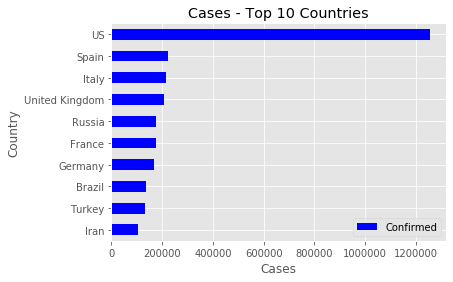

In [56]:
# Importing the required matplotlib libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Telling matplotlib to print 'inline' in this notebook
%matplotlib inline

# Selecting a style
plt.style.use('ggplot')

# Setting the axis, and printing the graph in descending order
fig, ax = plt.subplots()
Cases_Top10.plot(kind='barh', y="Confirmed", x="Country/Region", ax=ax, color='b')
ax.set(title='Cases - Top 10 Countries', xlabel='Cases', ylabel='Country')
ax.invert_yaxis()

We see US surpassing 1 million cases, while Spain (2nd in order), has around 20% of that cases number. 

Let's try the same with deaths, adding labels this time to the graph:

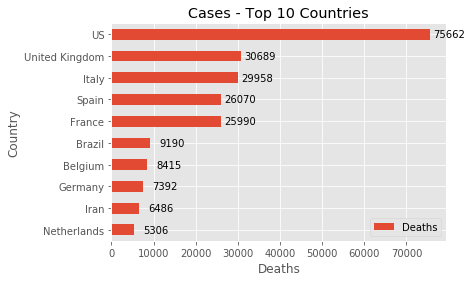

In [57]:
Deaths_Top10 = merged_total_new[merged_total_new.Date ==  max(merged_total_new.Date)].nlargest(10, 'Deaths')[['Country/Region','Deaths']]

fig, ax = plt.subplots()
Deaths_Top10.plot(kind='barh', y="Deaths", x="Country/Region", ax=ax)
ax.set(title='Cases - Top 10 Countries', xlabel='Deaths', ylabel='Country')
ax.invert_yaxis()

# Adding labels on the bar charts.
rects = ax.patches

# For each bar of the graph: 
for rect in rects:
    # Set the X and Y placement of the value label
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    
    # Number of points between bar and label.
    space = 35
    
    #The label (value) of each graph is represented by the width of the bar
    label = x_value 
    
    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha='right')                 # Horizontally align label


US is characterized by more than 75k deaths, and UK / Italy follow with less than half.
Italy/UK/Spain/France constitute a block of 4 comparable countries in terms of number of deaths.

Moving on, I will print a *stacked area chart* to see the timeseries progress of Deaths / Recovered / Active:

[Text(0, 0.5, 'Number of incidents'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Cases evolution')]

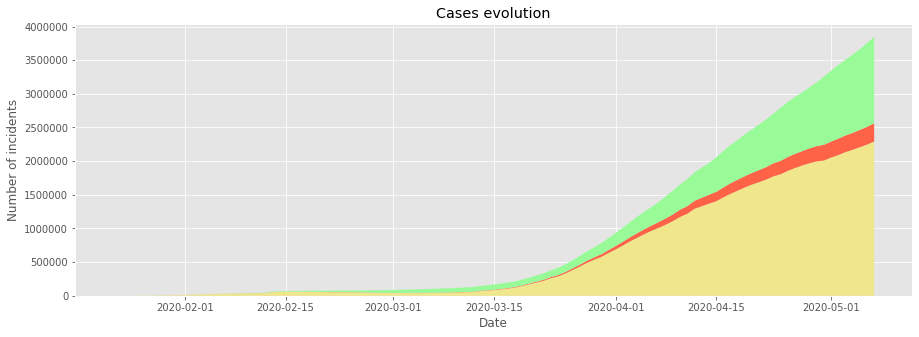

In [58]:
cases_split = merged_total_new.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15,5))
x, y1, y2, y3 = cases_split['Date'], cases_split['Recovered'], cases_split['Deaths'], cases_split['Active']


plt.stackplot(x, y3, y2, y1, colors=['khaki','tomato','palegreen'])
ax.set(title='Cases evolution', xlabel='Date', ylabel='Number of incidents')

# Red is deaths, Yellow is active, and Green is recovered.

As US is the most affected country, let's plot a timeseries with the New Cases by day. 
We can plot this versus China, which has been the first country affected.

In [59]:
US_China_Cases = merged_total_new.loc[((merged_total_new['Country/Region'] == 'US') |
                                  (merged_total_new['Country/Region'] == 'China'))][['Date','Country/Region','Confirmed']]

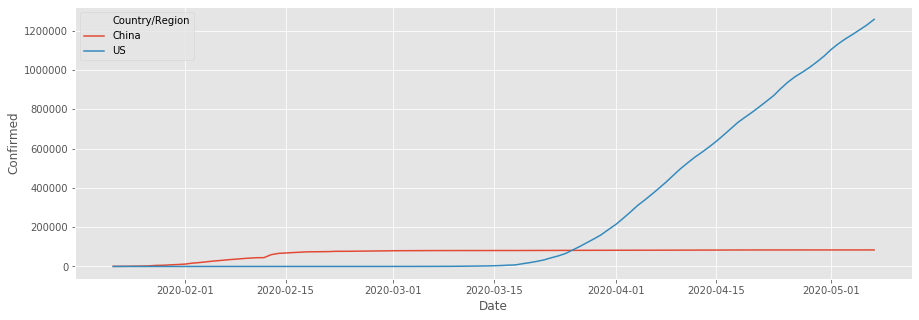

In [60]:
# For this we will use the seaborn library:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=US_China_Cases, x='Date', y='Confirmed', hue='Country/Region')

We observe that US started picking-up considerably later compared to China, but their number of confirmed cases increased dramatically very quickly.

Let's also have a look at the trend of total cases and deaths, on a daily basis.

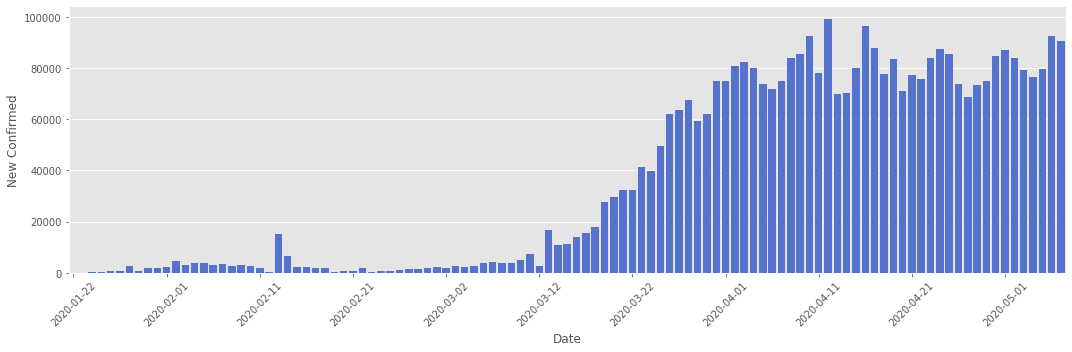

In [61]:
total_new = merged_total_new.groupby('Date')['New Confirmed', 'New Deaths'].sum().reset_index()
x, y1, y2 = total_new['Date'], total_new['New Confirmed'], total_new['New Deaths'] 

fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(y = y1, x= x, color='royalblue', data = total_new, ax=ax)

# set the frequency for labelling the xaxis
freq = 10

# set the xlabels as the datetime data for the given labelling frequency, use only the date for the label, 
# and rotate its position by 45 degrees
ax.set_xticklabels(total_new.iloc[::freq].Date.dt.date, rotation=45)

# set the xticks to the same frequency as the xlabels
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])

plt.tight_layout()

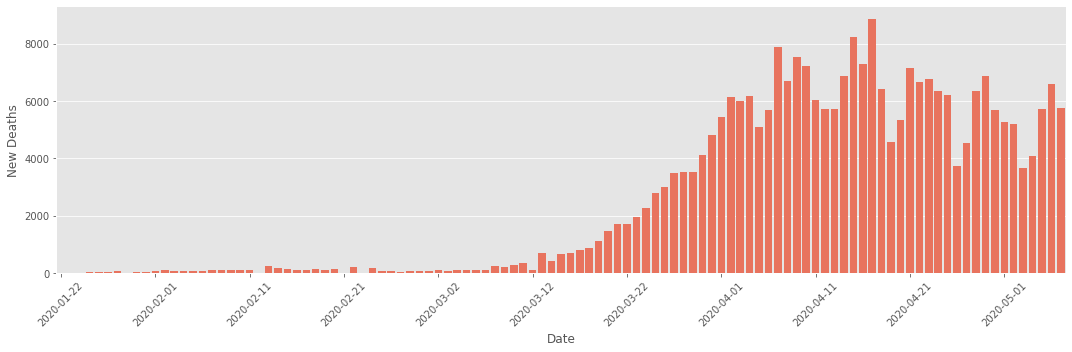

In [62]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(y = y2, x= x, color='tomato', data = total_new, ax=ax)

# set the frequency for labelling the xaxis
freq = 10

# set the xlabels as the datetime data for the given labelling frequency, use only the date for the label, 
# and rotate its position by 45 degrees
ax.set_xticklabels(total_new.iloc[::freq].Date.dt.date, rotation=45)

# set the xticks to the same frequency as the xlabels
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])

plt.tight_layout()

We see Cases trending stable, while Deaths following a downward trend by the end of April.

It would be also interesting to have a look at the US dataset as, and especially at the spread situation by *State*.

For this, I will use the **folium** library. 

In [63]:
#Creating a base map
import folium

#Setting up the world countries data URL
US_shapes = 'https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-states.json'

# Extracting the US Confirmed Cases by last date available
US_Cases = merged_US.loc[(merged_US['Date'] == max(merged_US['Date']))][['Province_State','Confirmed']].reset_index(drop=True)
US_Cases.head()

,Province_State,Confirmed
0,Alabama,9046
1,Alaska,374
2,American Samoa,0
3,Arizona,9945
4,Arkansas,3703


In [64]:
# Setting the location parameter in order to centre the map around the United States area
m = folium.Map(location=[38, -100],zoom_start=4)

#Adding the Choropleth layer onto our base map
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data = US_shapes,
    data= US_Cases,
    columns=['Province_State','Confirmed'],
    key_on='feature.properties.name',
    fill_color='PuRd',
    line_opacity=0.2,
    legend_name='USA Cases - COVID-19',
    nan_fill_color='darkblue'
).add_to(m)

m

We see that New York is leading in terms of Cases, followed by the neigbouring Philadelphia, Pennsylvania, Boston - as well as California.

## Interactive visualization on Tableau

As  mentioned, for further analysis I have prepared two detailed dashboards in Tableau - one for a worldwide analysis of Coronavirus, and one for US specifically. You can access them in the below links:

* <a href="https://public.tableau.com/profile/charisispapacharisis#!/vizhome/Covid-19-WorldwideEvolution/Dashboard" target="_blank">**Worldwide COVID-19 Dashboard**</a>.

* <a href="https://public.tableau.com/profile/charisispapacharisis#!/vizhome/USACOVID-19Dashboards/COVID-19OverviewintheUS" target="_blank">**USA COVID-19 Dashboard**</a>.